In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

# 1. Analysis of Teams

In [336]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [337]:
match_ids = matches[matches.season >= 2016]['id'].unique()

In [338]:
matches1 = matches[(matches.season >= 2016) & (matches['result']=='normal')]
matches1 = matches1.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)
matches1.dropna(inplace=True)

In [339]:
team_1 = 'Kolkata Knight Riders'
team_2 = 'Royal Challengers Bangalore'

In [340]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [341]:
today_match = matches1[(matches1.team1.isin([team_1, team_2])) & (matches1.team2.isin([team_1, team_2]))]
today_match.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
26,27,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Kolkata Knight Riders,82,0
44,45,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,6
605,606,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,5
623,624,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,0,9
638,7896,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,4


## The below plot suggest that whichever team wins the toss, generally will choose balling over batting. 

Text(0.5, 1.0, 'Toss Decision taken by Teams when they win the toss')

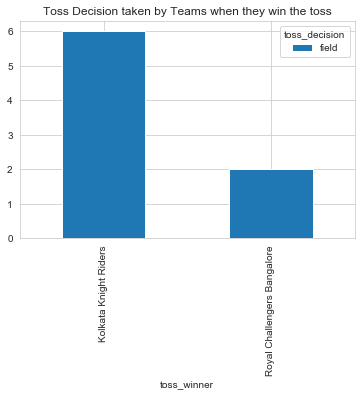

In [342]:
sns.set_style('whitegrid')
pd.crosstab(today_match.toss_winner, today_match.toss_decision).plot(kind='bar')
plt.title("Toss Decision taken by Teams when they win the toss")

## The plot below suggests that KKR will win the toss

Text(0.5, 1, 'Chances of Winning Toss')

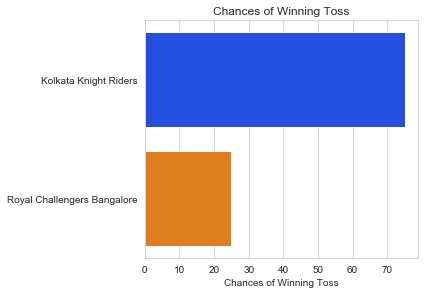

In [343]:
toss_wins = pd.DataFrame(today_match['toss_winner'].value_counts())
toss_wins['Chances of Winning Toss'] = toss_wins['toss_winner']*100/sum(toss_wins['toss_winner'])
sns.barplot(x=toss_wins['Chances of Winning Toss'], y=toss_wins.index, palette='bright')
plt.tight_layout()
plt.title('Chances of Winning Toss')

## The plot below suggests that KKR will win the match

Text(0.5, 1.0, 'Percentage of Winning')

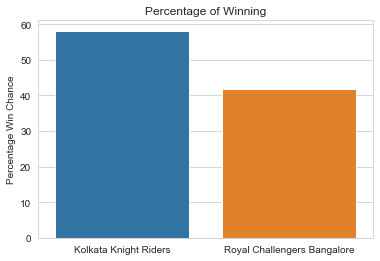

In [354]:
wins = pd.DataFrame(matches1['winner'].value_counts().loc[[team_1, team_2]])
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

# 2. Analysis of Players and Stats

In [345]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [356]:
delivery = delivery[delivery.match_id.apply(lambda x: True if x in match_ids else False)]
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

In [355]:
dk = 'KD Karthik'
vk = 'V Kohli'
dk_matches = delivery[(delivery.batting_team==team_1) & (delivery.batsman==dk)]


# Dinesh Kartik Scores

Text(0.5, 1.0, 'Dinesh Karthik score in KKR against all RCB matches')

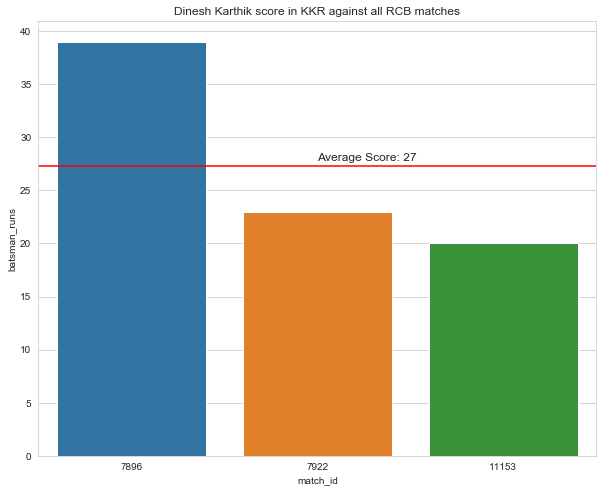

In [349]:
dk_vs_rcb = dk_matches[dk_matches['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=dk_vs_rcb)
plt.axhline(y=np.mean(dk_vs_rcb['batsman_runs']), color='red')
plt.text(x=1, y=np.mean(dk_vs_rcb['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(dk_vs_rcb['batsman_runs']))))
plt.title('Dinesh Karthik score in KKR against all RCB matches')

Text(0.5, 1.0, 'Dinesh Karthik score against all RCB matches from 2016 onwards')

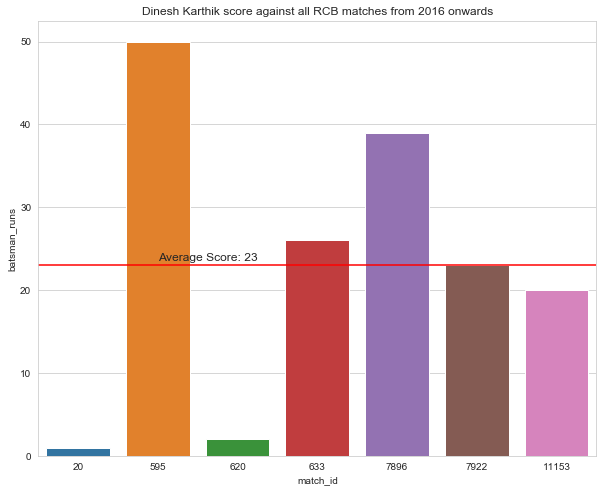

In [350]:
dk_matches1 = delivery[(delivery.batsman==dk)]
dk_vs_rcb1 = dk_matches1[dk_matches1['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=dk_vs_rcb1)
plt.axhline(y=np.mean(dk_vs_rcb1['batsman_runs']), color='red')
plt.text(x=1, y=np.mean(dk_vs_rcb1['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(dk_vs_rcb1['batsman_runs']))))
plt.title('Dinesh Karthik score against all RCB matches from 2016 onwards')

#  Virat Kohli No. of 4s

Generally, Virat Kohli hits 5.0 no. of 4s against KKR


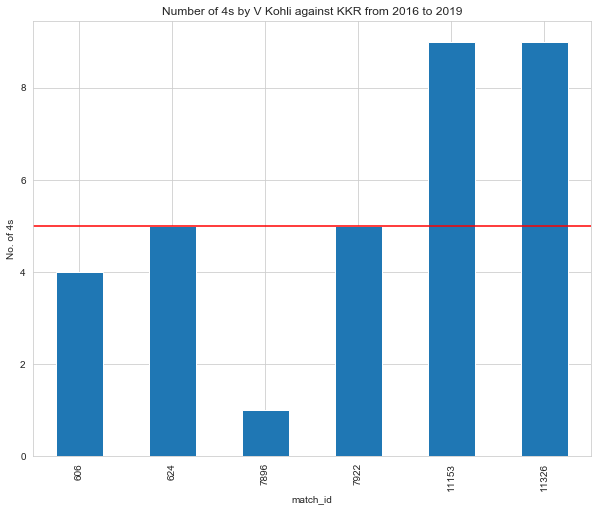

In [351]:
plt.figure(figsize=(10,8))
delivery[(delivery['batsman']==vk) & (delivery['bowling_team']==team_1) & (delivery['batsman_runs']==4)].groupby('match_id').count()['batsman_runs'].plot(kind='bar')
plt.axhline(y=np.median(delivery[(delivery['batsman']==vk) & (delivery['bowling_team']==team_1) & (delivery['batsman_runs']==4)].groupby('match_id').count()['batsman_runs'].median()), color='red')
plt.title("Number of 4s by V Kohli against KKR from 2016 to 2019")
plt.ylabel("No. of 4s")
print("Generally, Virat Kohli hits {} no. of 4s against KKR".format(delivery[(delivery['batsman']==vk) & (delivery['bowling_team']==team_1) & (delivery['batsman_runs']==4)].groupby('match_id').count()['batsman_runs'].median()))

In [352]:
kkr_present_bowlers = ['V Chakravarthy', 'P Krishna', 'PJ Cummins', 'AD Russell', 'SP Narine', 'N Rana']
rcb_present_bowlers = ['YS Chahal', 'N Saini', 'CH Morris', 'S Dube', 'Mohammed Siraj']
today_bowler_squad = kkr_present_bowlers + rcb_present_bowlers

# No. of No-balls

Text(0.5, 1.0, 'No of no-balls delivered by the today playing XI squad bowlers during 2016-2019')

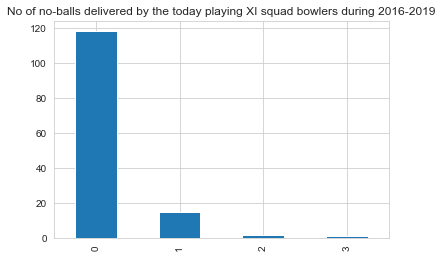

In [353]:
delivery[delivery['bowler'].isin(today_bowler_squad)].groupby('match_id').sum()['noball_runs'].value_counts().plot(kind='bar')
plt.title("No of no-balls delivered by the today playing XI squad bowlers during 2016-2019")

#### Though accuracy of not bowling a no-ball is high, but due to uncertainity we are here considering(no. of no balls in today's match =  1) becuase the number is also substantial as compared. 